In [85]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf


In [86]:
dataset_path = "animals"
print(os.listdir(dataset_path))

['cat', 'dog']


In [87]:
label_class = ["cat","dog"]
images = []
class_list = []

In [88]:
for i, class_name in enumerate(label_class):
    class_path = os.path.join(dataset_path, class_name)
    for filename in os.listdir(class_path):
        image = load_img(os.path.join(class_path, filename), target_size= (224, 224))
        image = img_to_array(image)
        image = tf.image.rgb_to_grayscale(image)
        image = image / 255.0
        images.append(image)
        class_list.append(i)

In [89]:
images = np.array(images, dtype=np.float32)
class_list = np.array(class_list)


images, class_list = shuffle(images, class_list, random_state=42)

In [90]:
images.shape

(1000, 224, 224, 1)

In [91]:
X_train, X_temp, y_train, y_temp = train_test_split(images, class_list, test_size=0.35, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.30, random_state=42)




In [92]:
model = Sequential([
    Conv2D(32, (3, 3),  padding='same', input_shape=(224, 224, 1)),
    Activation('relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3),  padding='same'),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.35),

    Conv2D(64, (3, 3),  padding='same'),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.35),

    Flatten(),
    Dense(32),
    Activation('relu'),
    Dropout(0.35),

    Dense(1, activation='sigmoid')  
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()



c:\Users\alsab\anaconda3\envs\anaconda-toolbox\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 224, 224, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │     1,605,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,661,441 (6.34 MB)

 Trainable params: 1,661,441 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

In [93]:
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=35,
    batch_size=20,
    callbacks=[early_stopping, reduce_lr]
)



Epoch 1/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step - accuracy: 0.5125 - loss: 0.7255 - val_accuracy: 0.6490 - val_loss: 0.6918 - learning_rate: 0.0010
Epoch 2/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - accuracy: 0.6177 - loss: 0.6761 - val_accuracy: 0.7020 - val_loss: 0.5771 - learning_rate: 0.0010
Epoch 3/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.7696 - loss: 0.5177 - val_accuracy: 0.7959 - val_loss: 0.4714 - learning_rate: 0.0010
Epoch 4/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.8045 - loss: 0.4531 - val_accuracy: 0.8000 - val_loss: 0.4325 - learning_rate: 0.0010
Epoch 5/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.8232 - loss: 0.3836 - val_accuracy: 0.7837 - val_loss: 0.4168 - learning_rate: 0.0010
Epoch 6/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.8352 - loss: 0.3389 - val_accuracy: 0.8163 - val_loss: 0.3800 - learning_rate: 0.0010
Epoch 7/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.8909 - loss: 0.2768 - 

In [94]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9431 - loss: 0.3115
Test Loss: 0.4368
Test Accuracy: 0.9333


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


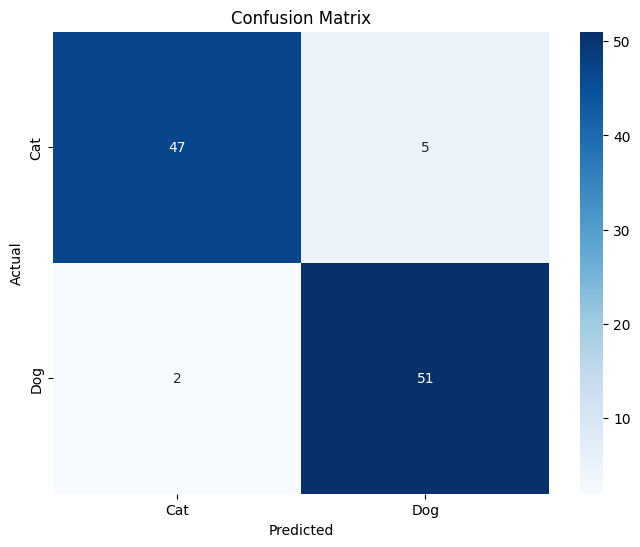

Classification Report:
              precision    recall  f1-score   support

         Cat       0.96      0.90      0.93        52
         Dog       0.91      0.96      0.94        53

    accuracy                           0.93       105
   macro avg       0.93      0.93      0.93       105
weighted avg       0.93      0.93      0.93       105



In [95]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Cat', 'Dog']))


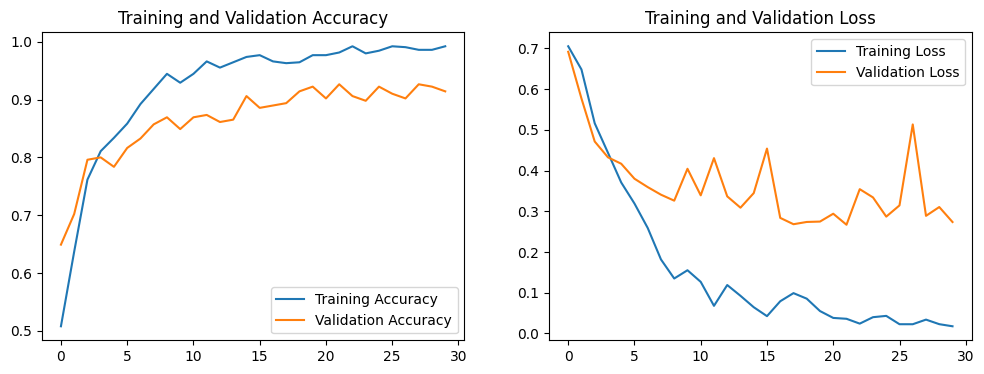

In [96]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


In [97]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9431 - loss: 0.3115
Loss: 0.4368
Accuracy: 0.9333


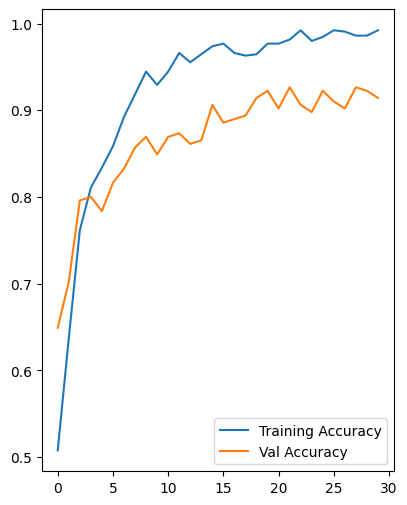

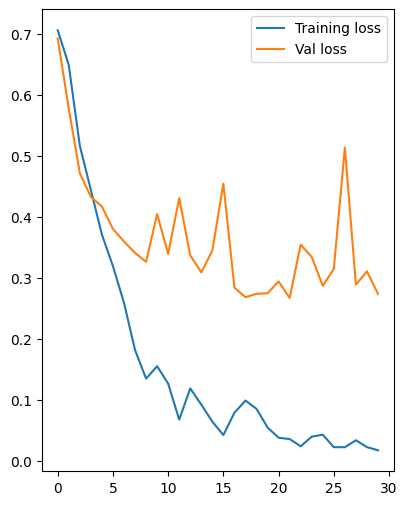

In [98]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()

plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()

plt.show()